<a href="https://colab.research.google.com/github/GodJiLee/Tensorflow-Study/blob/main/7/25_%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EA%B5%90%EA%B3%BC%EC%84%9C_ch3%264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **3.2 비지도 학습**

|구분|군집|차원 축소|
|------|---|---|
|**목표**|데이터 그룹화|데이터 간소화|
|**주요 알고리즘**|K-평균 군집화 (K-means)|주성분 분석 (PCA)|
|**예시**|사용자의 관심사에 따라 그룹화하여 마케팅에 활용|* 데이터 압축|
|    | |* 중요한 속성 도출|  

### **3.2.1 K-평균 군집화**
레이블이 없는 데이터를 입력받아 각 데이터에 레이블을 할당해 군집화를 수행함
1. 중심점 선택 (K)
2. 클러스터 할당: 중심점과 개별 데이터 간 거리를 측정한 후 가장 가까운 중심점 기준으로 할당
3. 새로운 중심점 선택
4. 범위 확인: 중심점에 변화 없을 때까지 반복

* K-평균 군집화 알고리즘을 사용하지 않는 것이 좋은 경우
* K를 잘 설정하는 것이 중요함

In [ ]:
# 라이브러리 호출
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/chap3/data/sales data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


* Channel - 고객 채널 또는 소매 채널
* Region - 고객 지역
* Fresh - 신선한 제품에 대한 연간 지출
* Milk - 유제품에 대한 연간 지출
* Grocery - 식료품에 대한 연간지출
* Detergents_Paper: 세제 및 종이 제품에 대한 연간 지출
* Delicassen - 조제 식품에 대한 연간 지출

In [ ]:
# 연속형 데이터와 명목형 데이터로 분류
categorical_features = ['Channel', 'Region'] # 명목형
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] # 연속형

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix = col) # 바이너리로 변환 (get_dummies)
    data = pd.concat([data, dummies], axis = 1)
    data.drop(col, axis = 1, inplace = True) # inplace는 원본에 반영

data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


연속형 데이터의 경우, 모든 특성에 동일한 중요성을 부여하기 위해 스케일링을 적용해야 함   
> 데이터의 범위가 다른 문제로, 1 ~ 100의 범위를 갖는 데이터에서 증가분 1과 1~1억의 범위를 갖는 데이터에서 증가분 1의 의미가 달라짐

사이킷런의 MinMaxScaler() 모듈 사용

In [ ]:
# 데이터 전처리 (스케일링 적용)
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [ ]:
# 적당한 K 값 추출
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k) # 1~15의 k 적용
    km = km.fit(data_transformed) # KMeans 모델 훈련
    Sum_of_squared_distances.append(km.inertia_)

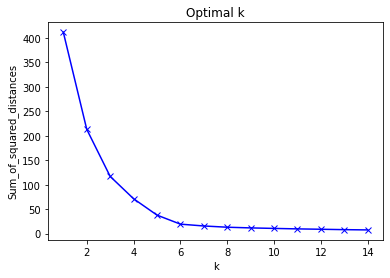

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

위 그래프에서 Sum_of_sqaured_distances는 **'거리제곱합 (SSD)'**으로 유사성을 측정하는 데 사용됨   
* K가 증가하면 SSD가 0에 수렴하는 경향이 있음
> 각 데이터가 자기 자신의 클러스터가 되므로

* 따라서 위 그림에서 0으로 수렴하기 시작하는 k=6 직전의 k=5를 선택하는 것이 적정

### **3.2.2 밀도 기반 군집 분석**
일정 밀도 이상을 가진 데이터를 기준으로 군집을 형성하는 방법
* K-Means와 달리 클러스터의 숫자를 모를 때 (K를 모름)에 유용함   
* 노이즈에 영향을 받지 않으며, 데이터에 이상치가 많을 때 좋음
* K-means가 잘 처리하지 못하는 오목/볼록한 부분 처리에 유용함

> * **노이즈**: 주어진 데이터셋과 무관하거나, 무작위성 데이터로 전처리 시 제거해야 할 부분*   
> * **이상치**: 관측된 데이터 범위에서 벗어난 아주 작은/큰 값*


**밀도 기반 군집분석 절차**
1. 엡실론 내 점의 개수 확인 및 중심점 결정
2. 군집 확장
3. 1-2단계 반복
4. 노이즈 정의

### **3.2.3 주성분 분석(PCA)**

고차원 데이터의 경우, 처리해야 할 데이터의 양이 많아짐에 따라 성능 저하 문제가 발생함   
이를 해결하고자 고차원 -> 저차원 축소하는 알고리즘으로 PCA(Principal Component Analysis) 알고리즘 사용

* 데이터들의 분포 특성을 잘 설명하는 벡터를 두 개 선택
> e_1, e_2 벡터의 방향/크기를 알면 데이터 분포를 알 수 있음
* 벡터 두 개를 위한 적정 가중치를 찾을 때까지 학습을 진행
> 여러 데이터가 모여 하나의 분포를 이룰 때, 이 분포의 주성분을 분석하는 방식   
> *주성분: 데이터의 분포를 가장 잘 설명하는 변수*   

밀도 기반 군집 분석 + PCA 로 훈련 데이터를 정확하게 클러스터링 해봄

In [ ]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [ ]:
# 데이터 불러오기
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/chap3/data/credit card.csv')
X = X.drop('CUST_ID', axis = 1) # CUST_ID 열 삭제
X.fillna(method = 'ffill', inplace = True)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


df.fillna(method = 'ffill') 은 결측치를 앞의 값으로 대체해서 채워넣는 method

In [ ]:
# 데이터 전처리 및 데이터를 2차원으로 차원 축소
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # 평균 0, 표준편차 1이 되도록 크기 조정

X_normalized = normalize(X_scaled) # 가우스 분포 따르도록 정규화
X_normalized = pd.DataFrame(X_normalized) 

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized) # 차원 축소
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
X_principal.head()

,P1,P2
0,-0.489949,-0.679977
1,-0.519099,0.544825
2,0.330633,0.268880
3,-0.481656,-0.097611
4,-0.563512,-0.482506


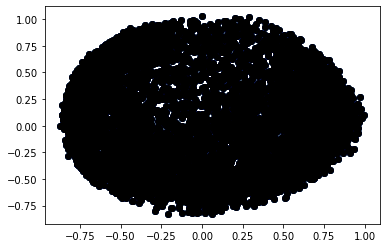

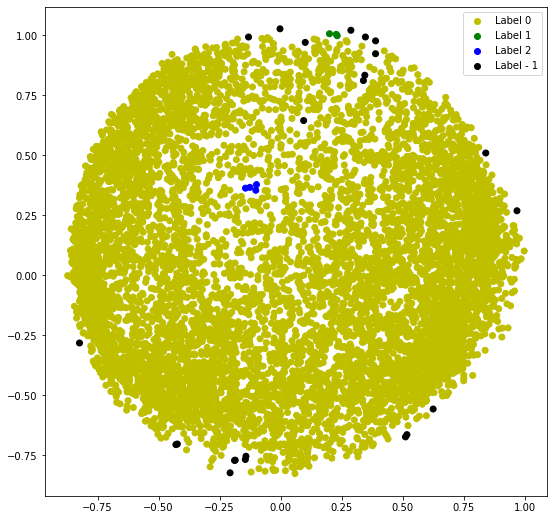

In [ ]:
# DBSCAN 모델 생성 및 결과의 시각화
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_pricnipal)
labels = db_default.labels_

colours = {} # 출력 그래프의 색상을 위한 레이블 생성
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]

r = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'y')
g = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'g')
b = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'b')
k = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'k') # 플롯의 범례 구성

plt.figure(figsize = (9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c= cvec) # X축에 P1, Y축에 P2 플로팅

plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label - 1')) # 범례 구축
plt.show()

하이퍼파라미터 등 모델 튜닝이 필요함

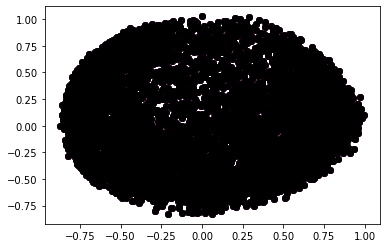

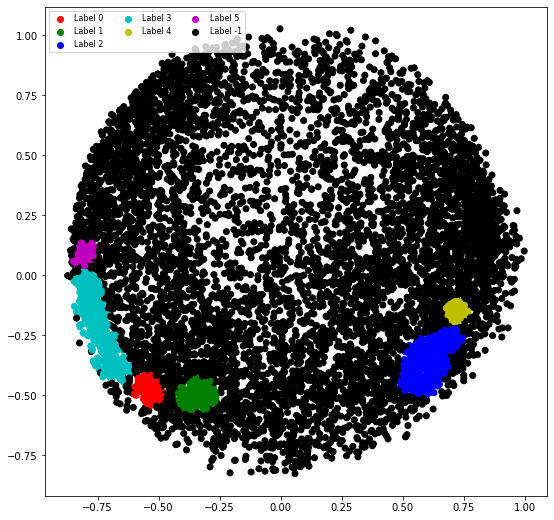

In [ ]:
# 모델 튜닝
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker = 'o', color = colors1[0])
g = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker = 'o', color = colors1[1])
b = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker = 'o', color = colors1[2])
c = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker = 'o', color = colors1[3])
y = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker = 'o', color = colors1[4])
m = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker = 'o', color = colors1[5])
k = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker = 'o', color = colors1[6])

plt.figure(figsize = (9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r, g, b, c, y, m , k),
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'),
           scatterpoints = 1,
           loc = 'upper left',
           ncol = 3,
           fontsize = 8)

plt.show()

min-samples(minPts: 군집으로 분류하기 위해 포함해야 하는 점의 최소 개수)의 하이퍼파라미터를 3 -> 50으로 변경   
앞의 db_default 보다 군집 표현이 잘 됨

In [ ]:
# min_samples를 50에서 100으로 변경
db = DBSCAN(eps = 0.0375, min_samples = 100).fit(X_principal)

밀도 기반 군집 분석 모델의 하이퍼파리미터 min_samples를 50 -> 100 으로 변경   
> 군집의 상당 부분이 무시됨   
> **하이퍼파라미터 튜닝**의 중요성 (8장에서 further한 내용 다룸)

# **4장 딥러닝 시작**
## **4.1 인공 신경망의 한계와 딥러닝 출현**
오늘날 인공 신경망이 이용하는 구조는 **퍼셉트론** 이라는 선형 분류기
> 퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력     
> 흐른다/ 안 흐른다 (1 또는 0)의 정보를 앞으로 전달하는 원리로 작동함

* **AND 게이트**   
모든 입력이 1일 때 작동, 하나라도 0이면 멈춤

* **OR 게이트**   
둘 중 하나만 1이거나 둘 다 1일 때 작동, 모두 0을 가질 때 멈춤

* **XOR 게이트**   
배타적 논리합, 두 개 중 한 개만 1일 때 작동   
> 비선형적인 분류로 단층 퍼셉트론에서는 학습이 불가능   
>> 입력층과 출력층 사이에 하나 이상의 은닉층을 두어 학습하는 **'다층 퍼셉트론'**을 고안함   
>>> 이를 **심층 신경망**, **딥러닝**이라고 부름